In [82]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Function we'll call each iteration (or step) of the gradient algorithm.
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one.'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept.
        point_alpha = -(2/n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope.
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha 
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

$$\frac{\partial}{\partial\alpha} =\frac2n \sum_{i=1}^n - (y^i-(\alpha + \beta x_i) )$$

$$\frac{\partial}{\partial\beta} =\frac2n \sum_{i=1}^n - x_i(y^i-(\alpha + \beta x_i))$$

In [205]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, threshold=.0001, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [206]:
import math

In [207]:
X = np.array(range(1,11))
y = np.log(X)

In [208]:
linear_regression(X,y)

(0.2586631799160805, 0.04579556239876547, 0.05397294349663465)

In [152]:
alpha,beta,learning_rate=0,0,.1

alpha = der_alpha_sum(X,y,alpha,beta)
beta = der_beta_sum(X,y,alpha,beta)
    
new_a = alpha-learning_rate*alpha
new_b = beta-learning_rate*beta

In [153]:
new_a,new_b

(-63.0, -1125.0)

In [138]:
der_alpha = lambda X,y,a,b,n: -(2/n)*(y-(a+b*X))
der_beta = lambda X,y,a,b,n: -(2/n)*X*(y-(a+b*X))

In [139]:
alpha,beta,learning_rate=0,0,.1
n = len(x)
for i in range(n):
    alpha+=der_alpha(X[i],y[i],alpha,beta,n)
    beta+=der_beta(X[i],y[i],alpha,beta,n)
    
new_a = alpha-learning_rate*alpha
new_b = beta-learning_rate*beta

In [140]:
new_a,new_b

(-26788656.668574974, -314937385.8379723)

In [41]:
x = list(range(-20,20))
y = [df(v) for v in x]

In [79]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.6 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function 

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("[{0:}] X: {1}, Grad Descent: {2}, step_size: {3}".format(iters,cur_x,rate *df(cur_x),previous_step_size)) #Print iterations
    
print("The local minimum occurs at", cur_x)

[1] X: -6.6, Grad Descent: -1.9199999999999995, step_size: 9.6
[2] X: -4.68, Grad Descent: 0.38400000000000034, step_size: 1.92
[3] X: -5.064, Grad Descent: -0.07680000000000006, step_size: 0.38400000000000034
[4] X: -4.9872, Grad Descent: 0.01536000000000044, step_size: 0.07680000000000042
[5] X: -5.00256, Grad Descent: -0.0030719999999998747, step_size: 0.015360000000000262
[6] X: -4.999488, Grad Descent: 0.0006143999999995486, step_size: 0.0030719999999995196
[7] X: -5.0001024, Grad Descent: -0.00012288000000033604, step_size: 0.0006143999999999039
[8] X: -4.99997952, Grad Descent: 2.4575999999854046e-05, step_size: 0.00012288000000015842
[9] X: -5.000004096, Grad Descent: -4.9151999995444834e-06, step_size: 2.4575999999498777e-05
[10] X: -4.9999991808, Grad Descent: 9.830400003352224e-07, step_size: 4.915199999899755e-06
[11] X: -5.00000016384, Grad Descent: -1.966080002802073e-07, step_size: 9.830400005128581e-07
The local minimum occurs at -5.00000016384


In [4]:
import numpy as np

In [17]:
# array of items
# array of items
X = np.array([1, 2.5, 3.1, 4.6, 5.9,6,7,8.1,9.6,10.4,10.7])
N = len(X)
p=2

In [24]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
series = Series.from_csv('../data/timeseries/daily-total-female-births-in-cal.csv', header=0)

/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [25]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [25]:
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

In [36]:
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [39]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    print(lag)
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

[5.0, 1.0, -12.0, 11.0, -6.0, 8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0]
[1.0, -12.0, 11.0, -6.0, 8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0]
[-12.0, 11.0, -6.0, 8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0]
[11.0, -6.0, 8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0]
[-6.0, 8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0]
[8.0, 0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0]
[0.0, -6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0, 2.0]
[-6.0, -1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0, 2.0, 9.0]
[-1.0, 5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0, 2.0, 9.0, -7.0]
[5.0, 4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0, 2.0, 9.0, -7.0, 1.0]
[4.0, 2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0, 2.0, 9.0, -7.0, 1.0, -9.0]
[2.0, -9.0, 1.0, 9.0, -10.0, 3.0, -6.0, 30.0, -28.0, 2.0, 9.0, -7.0, 1

predicted error=-7.083363, expected error=-10.000000
predicted error=2.992464, expected error=3.000000
predicted error=-0.727356, expected error=-6.000000
predicted error=5.600624, expected error=30.000000
predicted error=-19.877836, expected error=-28.000000
predicted error=4.832663, expected error=2.000000
predicted error=3.127385, expected error=9.000000
predicted error=-5.035700, expected error=-7.000000
predicted error=1.202267, expected error=1.000000
predicted error=-0.221565, expected error=-9.000000
predicted error=9.214665, expected error=21.000000
predicted error=-7.082098, expected error=-13.000000
predicted error=1.237418, expected error=-2.000000
predicted error=2.737747, expected error=11.000000
predicted error=-4.785289, expected error=-11.000000
predicted error=2.419604, expected error=-8.000000
predicted error=9.194064, expected error=6.000000
predicted error=3.128481, expected error=16.000000
predicted error=-6.620736, expected error=-12.000000
predicted error=1.2561

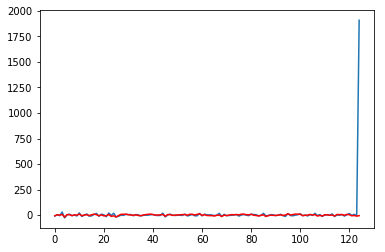

In [31]:
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()